<a href="https://colab.research.google.com/github/Vo-Hao250604/Video_Analytics/blob/main/Video_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.IMPORT & LOAD DATA

In [4]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ML
from sklearn.ensemble import IsolationForest, RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_auc_score, precision_recall_fscore_support
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load
df = pd.read_excel("/content/drive/MyDrive/T202303.xlsx")
df.shape, df.columns.tolist()


((6545, 44),
 ['SĐT người tạo đơn',
  'Người tạo đơn',
  'Siêu thị',
  'Mã ST',
  'Khu vực',
  'Mã chuyến',
  'Ngày tạo đơn',
  'Mã đơn hàng',
  'Giá trị đơn hàng',
  'Địa chỉ lấy hàng',
  'Địa chỉ khách',
  'Địa chỉ chi tiết',
  'Ghi chú',
  'Tài xế',
  'SĐT',
  'km đơn',
  'km chuyến',
  'Mã dịch vụ',
  'trạng_thái_đơn',
  'trang_thai_chuyến',
  'ly_do_huy',
  'Đơn ưu tiên',
  'Hạng thành viên',
  'Phí vượt km',
  'Phụ phí thu khách',
  'Mô tả phụ phí KH',
  'Tổng phí thu khách',
  'Thu hộ COD',
  'Tổng thu khách hàng',
  'Phụ phí trả tài xế',
  'Mô tả phụ phí TX',
  'Số chuyến',
  'Đơn giá chuyến',
  'Phí chuyến cho tài',
  'Tổng phí trả tài xế',
  'Thời điểm tạo đơn',
  'Thời điểm tài xế nhận đơn',
  'Thời điểm tài xế đến nơi lấy hàng',
  'Thời điểm tài xế lấy hàng',
  'Thời gian hoàn thành đơn',
  'pod',
  'por',
  'tracking_link',
  'sdt_khach'])

# 2.EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
# Basic overview
print("Rows, cols:", df.shape)
display(df.head(5))
display(df.info())

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
display(missing.head(30))

# Quick numeric summary
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
display(df[num_cols].describe().T)

# Categorical overview (top values)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in cat_cols:
    print("=== Col:", c)
    print(df[c].value_counts(dropna=False).head(10))
    print()


Rows, cols: (6545, 44)


,SĐT người tạo đơn,Người tạo đơn,Siêu thị,Mã ST,Khu vực,Mã chuyến,Ngày tạo đơn,Mã đơn hàng,Giá trị đơn hàng,Địa chỉ lấy hàng,...,Tổng phí trả tài xế,Thời điểm tạo đơn,Thời điểm tài xế nhận đơn,Thời điểm tài xế đến nơi lấy hàng,Thời điểm tài xế lấy hàng,Thời gian hoàn thành đơn,pod,por,tracking_link,sdt_khach
0,84937806040,Trần Phương,CM Rạch Miễu,130,HCM2,230FQWMW-1,2023-03-03,43906/17,805000,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,8000.0,2023-03-03 18:43:29,2023-03-03 18:43:42,2023-03-03 19:19:19,2023-03-03 19:19:19,2023-03-03 20:29:11,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/230FQWMW...,NaN
1,84937806040,Trần Phương,CM Rạch Miễu,130,HCM2,23O6ZPRX-1,2023-03-03,95495/6,11966770,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,20000.0,2023-03-03 18:34:29,2023-03-03 18:41:10,2023-03-03 19:18:50,2023-03-03 19:18:50,2023-03-03 20:28:46,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/23O6ZPRX...,NaN
2,84937806040,Trần Phương,CM Rạch Miễu,130,HCM2,235WPWLG-1,2023-03-03,96241/8,2243384,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,16000.0,2023-03-03 18:34:28,2023-03-03 18:41:10,2023-03-03 18:42:05,2023-03-03 18:42:05,2023-03-03 19:09:57,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/235WPWLG...,NaN
3,84937806040,Trần Phương,CM Rạch Miễu,130,HCM2,239KWRK8-1,2023-03-03,95498/6,311200,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,8000.0,2023-03-03 18:34:26,2023-03-03 18:41:10,2023-03-03 19:18:35,2023-03-03 19:18:35,2023-03-03 20:28:27,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/239KWRK8...,NaN
4,84937806040,Trần Phương,CM Rạch Miễu,130,HCM2,23RU1UNH-1,2023-03-03,7252/12,938000,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,8000.0,2023-03-03 18:34:25,2023-03-03 18:41:10,2023-03-03 18:42:54,2023-03-03 18:42:54,2023-03-03 19:10:20,https://ahamove-assets.s3.ap-southeast-1.amazo...,NaN,https://cloud.ahamove.com/share-order/23RU1UNH...,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6545 entries, 0 to 6544
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SĐT người tạo đơn                  6545 non-null   int64  
 1   Người tạo đơn                      6545 non-null   object 
 2   Siêu thị                           6545 non-null   object 
 3   Mã ST                              6545 non-null   int64  
 4   Khu vực                            6545 non-null   object 
 5   Mã chuyến                          6545 non-null   object 
 6   Ngày tạo đơn                       6545 non-null   object 
 7   Mã đơn hàng                        6545 non-null   object 
 8   Giá trị đơn hàng                   6545 non-null   int64  
 9   Địa chỉ lấy hàng                   6545 non-null   object 
 10  Địa chỉ khách                      6545 non-null   object 
 11  Địa chỉ chi tiết                   48 non-null     objec

None

,0
Mô tả phụ phí KH,6539
por,6533
Địa chỉ chi tiết,6497
ly_do_huy,6422
Ghi chú,5653
Mô tả phụ phí TX,2731
sdt_khach,1662
pod,722
trạng_thái_đơn,108
Thời gian hoàn thành đơn,108


,count,mean,std,min,25%,50%,75%,max
SĐT người tạo đơn,6545.0,8.488051e+10,1.301412e+08,8.434349e+10,8.490318e+10,8.490916e+10,8.493369e+10,8.498884e+10
Mã ST,6545.0,2.425823e+02,1.487678e+02,1.300000e+02,1.360000e+02,1.590000e+02,3.050000e+02,5.700000e+02
Giá trị đơn hàng,6545.0,1.518582e+06,1.914677e+06,1.000000e+00,5.527850e+05,1.029200e+06,1.801375e+06,4.950000e+07
SĐT,6504.0,8.484665e+10,1.518231e+08,8.433742e+10,8.478943e+10,8.490701e+10,8.493178e+10,8.498962e+10
km đơn,6544.0,2.407876e+00,2.257851e+00,0.000000e+00,9.400000e-01,1.745000e+00,3.120000e+00,1.935000e+01
km chuyến,6545.0,2.409702e+00,2.330225e+00,0.000000e+00,9.300000e-01,1.730000e+00,3.090000e+00,1.996000e+01
Phí vượt km,6545.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Phụ phí thu khách,6545.0,3.319328e+01,1.792659e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+05
Tổng phí thu khách,6545.0,3.319328e+01,1.792659e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+05
Thu hộ COD,6545.0,2.519919e+05,8.636467e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.724400e+07


=== Col: Người tạo đơn
Người tạo đơn
Lê Quang Thảo           383
Trần Phương             273
TÔ VĂN NGHĨA            267
Duc Vo                  253
Lê Minh Huy             246
Nguyễn Bảo Minh Tuấn    213
Tôn Thất Nguyện         187
Trịnh Hồng Vũ .HMT      173
Trần Thanh Nguyệt       168
Trần Đĩnh Quang         166
Name: count, dtype: int64

=== Col: Siêu thị
Siêu thị
CM Nguyễn Đình Chiểu    684
CM Rạch Miễu            565
CM Lý Thường Kiệt       533
CM Nhiêu Lộc            415
CX Sư Vạn Hạnh          383
CM Huỳnh Tấn Phát       373
CM Phú Thọ              313
CM Hòa Bình             290
CM Hậu Giang            258
CX Linh Trung           255
Name: count, dtype: int64

=== Col: Khu vực
Khu vực
HCM2    3683
HCM1    2224
XTRA     638
Name: count, dtype: int64

=== Col: Mã chuyến
Mã chuyến
23F6N7GF-1    1
231CM75M-1    1
23V8V139-1    1
23TNDRWR-1    1
23IUP9T9-1    1
23K2A9X6-1    1
233EXA8C-1    1
23LD2JAV-1    1
23DQ2X9O-1    1
23I7JHDZ-1    1
Name: count, dtype: int64

=== Col: Ngày t

* Kiểm tra cột ngày giờ: trong file có nhiều cột "Thời điểm..." và "Ngày tạo đơn" convert về datetime.
* Biến tiền tệ (Giá trị đơn hàng, Tổng chi phí trả tài xế) - kiểm tra âm/ giá trị bất hợp lý.
* sdt_khach có missing → giữ tag unknown nếu cần.
* por chỉ có 12 non-null → drop hoặc ignore.

# 3.DATA CLEANING

> **Code chuẩn hóa datetime, xử lý missing, xử lý outliers**





In [7]:
# Cleaning & Datetime parsing
ts_cols = [
    "Ngày tạo đơn",
    "Thời điểm tạo đơn",
    "Thời điểm tài xế nhận đơn",
    "Thời điểm tài xế đến nơi lấy hàng",
    "Thời điểm tài xế lấy hàng",
    "Thời gian hoàn thành đơn"
]

for c in ts_cols:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Standardize phone customer
if "sdt_khach" in df.columns:
    df['sdt_khach'] = df['sdt_khach'].astype(str).replace('nan','').replace('None','').replace('nan.0','')
    df.loc[df['sdt_khach'].str.strip()=='' , 'sdt_khach'] = np.nan

# Convert numeric columns safe
num_cols = ["Giá trị đơn hàng","Phí chuyến cho tài","Tổng phí trả tài xế","Số chuyến","Đơn giá chuyến"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Trim string columns
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip().replace('nan','').replace('None','')
    df.loc[df[c]=='','nan_fix'] = np.nan

# Drop problematic columns with almost all nulls or irrelevant
if "por" in df.columns:
    if df['por'].nunique(dropna=True) <= 5 and df['por'].isna().sum() / len(df) > 0.9:
        df = df.drop(columns=['por'])

# Drop exact duplicates
dup_count = df.duplicated().sum()
print("Duplicates:", dup_count)
df = df.drop_duplicates()

# Remove rows where key datetimes missing (we'll keep partials but for duration calculations need completion)
df_clean = df.copy()
print("After cleaning:", df_clean.shape)

Duplicates: 0
After cleaning: (6545, 45)


# 4.FEATURE ENGINEERING

> **Feature thời gian, kinh tế, flags, arrgregated features**





In [9]:
# Basic time features
df_clean['order_date'] = df_clean['Ngày tạo đơn'].dt.date
df_clean['order_hour'] = df_clean['Thời điểm tạo đơn'].dt.hour.fillna(-1).astype(int)
df_clean['order_weekday'] = df_clean['Thời điểm tạo đơn'].dt.day_name().fillna('Unknown')

# Durations (minutes)
df_clean['delay_assign'] = (df_clean['Thời điểm tài xế nhận đơn'] - df_clean['Thời điểm tạo đơn']).dt.total_seconds()/60
df_clean['delay_arrive_store'] = (df_clean['Thời điểm tài xế đến nơi lấy hàng'] - df_clean['Thời điểm tài xế nhận đơn']).dt.total_seconds()/60
df_clean['delay_pickup'] = (df_clean['Thời điểm tài xế lấy hàng'] - df_clean['Thời điểm tài xế đến nơi lấy hàng']).dt.total_seconds()/60
df_clean['total_process_time'] = (df_clean['Thời gian hoàn thành đơn'] - df_clean['Thời điểm tạo đơn']).dt.total_seconds()/60

# Fill negatives as NaN (data error)
for c in ['delay_assign','delay_arrive_store','delay_pickup','total_process_time']:
    df_clean.loc[df_clean[c] < 0, c] = np.nan

# Financial features
df_clean['profit'] = df_clean['Giá trị đơn hàng'] - df_clean['Tổng phí trả tài xế']
df_clean['fee_ratio'] = df_clean['Tổng phí trả tài xế'] / df_clean['Giá trị đơn hàng']
df_clean.loc[df_clean['Giá trị đơn hàng']<=0, 'fee_ratio'] = np.nan

# Flags & categories
df_clean['multi_trip'] = (df_clean['Số chuyến'] > 1).astype(int)
df_clean['is_completed'] = (df_clean['trạng_thái_đơn'] == 'HOÀN THÀNH').astype(int)
df_clean['delivery_speed_cat'] = pd.cut(
    df_clean['total_process_time'],
    bins=[-1,15,30,45,9999],
    labels=['very_fast','fast','normal','slow']
)

# Store-level rolling stats (example)
store_stats = df_clean.groupby('Siêu thị').agg({
    'total_process_time': ['median','mean'],
    'Giá trị đơn hàng': 'mean',
    'Mã đơn hàng': 'count'
})
store_stats.columns = ['_'.join(col).strip() for col in store_stats.columns.values]
store_stats = store_stats.reset_index().rename(columns={'Mã đơn hàng_count':'store_order_count'})
df_clean = df_clean.merge(store_stats, how='left', on='Siêu thị')

# Create SLA flag: completed within 30 minutes
df_clean['sla_30m'] = (df_clean['total_process_time'] <= 30).astype(int)

In [11]:
features = df_clean.columns.tolist()
for f in features:
    print(f)

SĐT người tạo đơn
Người tạo đơn
Siêu thị
Mã ST
Khu vực
Mã chuyến
Ngày tạo đơn
Mã đơn hàng
Giá trị đơn hàng
Địa chỉ lấy hàng
Địa chỉ khách
Địa chỉ chi tiết
Ghi chú
Tài xế
SĐT
km đơn
km chuyến
Mã dịch vụ
trạng_thái_đơn
trang_thai_chuyến
ly_do_huy
Đơn ưu tiên
Hạng thành viên
Phí vượt km
Phụ phí thu khách
Mô tả phụ phí KH
Tổng phí thu khách
Thu hộ COD
Tổng thu khách hàng
Phụ phí trả tài xế
Mô tả phụ phí TX
Số chuyến
Đơn giá chuyến
Phí chuyến cho tài
Tổng phí trả tài xế
Thời điểm tạo đơn
Thời điểm tài xế nhận đơn
Thời điểm tài xế đến nơi lấy hàng
Thời điểm tài xế lấy hàng
Thời gian hoàn thành đơn
pod
por
tracking_link
sdt_khach
nan_fix
order_date
order_hour
order_weekday
delay_assign
delay_arrive_store
delay_pickup
total_process_time
profit
fee_ratio
multi_trip
is_completed
delivery_speed_cat
total_process_time_median
total_process_time_mean
Giá trị đơn hàng_mean
store_order_count
sla_30m




> **Danh sách features quan trọng tạo được:**

 **order_hour, order_weekday**

**delay_assign, delay_arrive_store, delay_pickup, total_process_time**

**profit, fee_ratio, multi_trip, is_completed**

**delivery_speed_cat, sla_30m**

**store_order_count, total_process_time_mean/median (store aggregated)**



# 5.KPI & PHÂN TÍCH NGHIỆP VỤ

In [15]:
kpis = {}
kpis['total_orders'] = len(df_clean)
kpis['completed_orders'] = df_clean['is_completed'].sum()
kpis['completion_rate'] = kpis['completed_orders'] / kpis['total_orders']
kpis['total_revenue'] = df_clean['Giá trị đơn hàng'].sum()
kpis['avg_process_time_min'] = df_clean['total_process_time'].median()
kpis['avg_fee_ratio'] = df_clean['fee_ratio'].median()

kpi_df = pd.Series(kpis).to_frame('value')
display(kpi_df)

,value
total_orders,6.545000e+03
completed_orders,6.413000e+03
completion_rate,9.798319e-01
total_revenue,9.939119e+09
avg_process_time_min,6.041667e+01
avg_fee_ratio,1.262509e-02


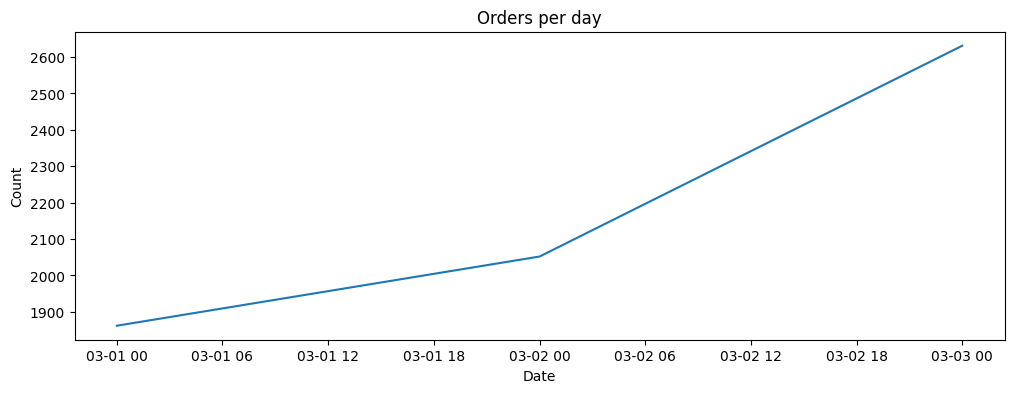

In [16]:
# Orders by day plot
orders_by_day = df_clean.groupby('order_date').size()
plt.figure(figsize=(12,4))
orders_by_day.plot(kind='line')
plt.title('Orders per day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

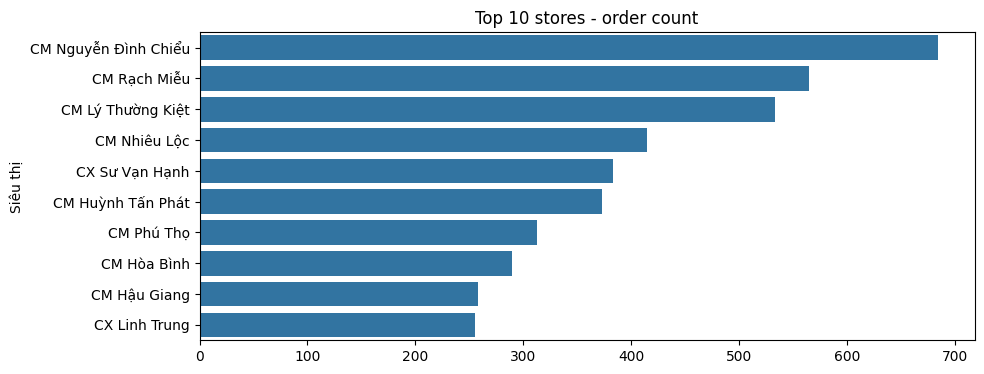

In [17]:
# Top 10 stores by order count
top_stores = df_clean['Siêu thị'].value_counts().head(10)
plt.figure(figsize=(10,4))
sns.barplot(x=top_stores.values, y=top_stores.index)
plt.title('Top 10 stores - order count')
plt.show()

In [18]:
# SLA by store (store-level)
sla_by_store = df_clean.groupby('Siêu thị')['sla_30m'].mean().sort_values()
display(sla_by_store.head(10))
display(sla_by_store.tail(10))

,sla_30m
Siêu thị,
CM Phan Văn Trị,0.064516
CM Bình Tân,0.079498
CX Sư Vạn Hạnh,0.099217
CM Rạch Miễu,0.107965
CM Thắng Lợi - Trường Chinh,0.108696
CM Hùng Vương,0.128571
CM Phú Thọ,0.130990
CM Lý Thường Kiệt,0.174484
CM Tuy Lý Vương,0.200000


,sla_30m
Siêu thị,
CM Đồng Văn Cống,0.367089
CM Foodcosa,0.376963
CM Hòa Bình,0.379310
CM Nhiêu Lộc,0.380723
CM Hóc Môn,0.444444
CM Củ Chi,0.465116
CM Vĩnh Lộc B,0.500000
CM Bình Tân 2,0.530612
CM Chu Văn An,0.717647


Insight có thể lấy ngay:

store nào có sla_30m thấp → ưu tiên training/operational fix

giờ cao điểm order_hour → tăng driver allocation

fee_ratio cao và profit thấp → may need pricing review



---



# 6.ANOMALY DETECTION

In [19]:
# 6.1 Statistical outliers: using IQR on total_process_time
def iqr_outlier_mask(series, k=1.5):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - k*iqr, q3 + k*iqr
    return (series < lower) | (series > upper)

df_clean['outlier_time_iqr'] = iqr_outlier_mask(df_clean['total_process_time'].dropna())
print("IQR outlier count:", df_clean['outlier_time_iqr'].sum())

# 6.2 Isolation Forest on features (scaled)
iso_features = df_clean[['total_process_time','delay_pickup','fee_ratio']].fillna(0)
scaler = StandardScaler()
X_iso = scaler.fit_transform(iso_features)

iso = IsolationForest(n_estimators=200, contamination=0.02, random_state=42)
df_clean['iso_anomaly'] = iso.fit_predict(X_iso)  # -1 anomaly, 1 normal
df_clean['iso_anomaly_flag'] = (df_clean['iso_anomaly'] == -1).astype(int)
print("IsolationForest anomalies:", df_clean['iso_anomaly_flag'].sum())

# Show anomaly samples
display(df_clean[df_clean['iso_anomaly_flag']==1].sort_values('total_process_time', ascending=False).head(20))

IQR outlier count: 579
IsolationForest anomalies: 131


,SĐT người tạo đơn,Người tạo đơn,Siêu thị,Mã ST,Khu vực,Mã chuyến,Ngày tạo đơn,Mã đơn hàng,Giá trị đơn hàng,Địa chỉ lấy hàng,...,is_completed,delivery_speed_cat,total_process_time_median,total_process_time_mean,Giá trị đơn hàng_mean,store_order_count,sla_30m,outlier_time_iqr,iso_anomaly,iso_anomaly_flag
1703,84933947733,Hồ Minh Tiến,CM Nguyễn Ảnh Thủ,141,HCM2,23SWVI44-1,2023-03-02,2/1,7000000,"167/2 Nguyễn Ảnh Thủ, P.Trung Mỹ Tây, Q.12, Tp...",...,1,NaN,171.050000,493.147853,2.450394e+06,168,0,True,-1,1
3830,84906370428,Lý Đa Đa,CM Củ Chi,175,HCM2,2356GM9P-1,2023-03-02,52694/1,919459,"357 Quốc lộ 22, Tân Thông Hội, Củ Chi, Thành p...",...,1,slow,32.375000,99.201357,1.972280e+06,86,0,True,-1,1
213,84906709800,Hồ Anh Tuấn,CM Rạch Miễu,130,HCM2,23Q9OT58-1,2023-03-01,10/00313,1420216,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,1,slow,125.283333,269.073220,1.347705e+06,565,0,True,-1,1
216,84906709800,Hồ Anh Tuấn,CM Rạch Miễu,130,HCM2,239EBMQU-1,2023-03-01,16/62623,780200,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,1,slow,125.283333,269.073220,1.347705e+06,565,0,True,-1,1
217,84906709800,Hồ Anh Tuấn,CM Rạch Miễu,130,HCM2,23WA3F4W-1,2023-03-01,14/86658,1956747,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,1,slow,125.283333,269.073220,1.347705e+06,565,0,True,-1,1
218,84906709800,Hồ Anh Tuấn,CM Rạch Miễu,130,HCM2,23GHSTRH-1,2023-03-01,19/89640,1126600,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,1,slow,125.283333,269.073220,1.347705e+06,565,0,True,-1,1
219,84906709800,Hồ Anh Tuấn,CM Rạch Miễu,130,HCM2,23D5KBFQ-1,2023-03-01,19/89632,710000,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,1,slow,125.283333,269.073220,1.347705e+06,565,0,True,-1,1
220,84906709800,Hồ Anh Tuấn,CM Rạch Miễu,130,HCM2,235GB1QD-1,2023-03-01,9/32166,324700,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,1,slow,125.283333,269.073220,1.347705e+06,565,0,True,-1,1
221,84906709800,Hồ Anh Tuấn,CM Rạch Miễu,130,HCM2,23NAV4E4-1,2023-03-01,9/32167,1044600,"48 Hoa Sứ, Phường 7 Phú Nhuận, Phú Nhuận, Thàn...",...,1,slow,125.283333,269.073220,1.347705e+06,565,0,True,-1,1
1640,84914101255,Trần Duy Khang,CM Nguyễn Ảnh Thủ,141,HCM2,23T78W1M-1,2023-03-03,1309/24,403000,"167/2 Nguyễn Ảnh Thủ, P.Trung Mỹ Tây, Q.12, Tp...",...,1,slow,171.050000,493.147853,2.450394e+06,168,0,True,-1,1


Interpretation:

Dòng anomalous quá cao total_process_time → có thể là lỗi hệ thống, khách hủy, tài xế nghỉ... cần check log cụ thể.



---



# 7.CLUSTERING - PHÂN ĐOẠN SIÊU THỊ

Phân nhóm siêu thị theo performance.

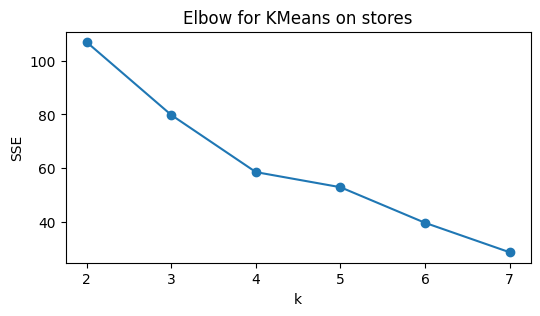

,orders,avg_time,median_time,sla_rate,avg_profit,cluster
Siêu thị,,,,,,
CM Nguyễn Đình Chiểu,684,103.875838,64.066667,0.235380,1.827328e+06,1
CM Rạch Miễu,565,269.073220,125.283333,0.107965,1.331910e+06,1
CM Lý Thường Kiệt,533,108.749464,72.466667,0.174484,1.343670e+06,1
CM Nhiêu Lộc,415,58.283985,41.150000,0.380723,1.493226e+06,1
CX Sư Vạn Hạnh,383,141.142754,101.325000,0.099217,1.549819e+06,1
CM Huỳnh Tấn Phát,373,90.286577,53.308333,0.246649,1.816338e+06,1
CM Phú Thọ,313,176.032105,78.691667,0.130990,1.381527e+06,1
CM Hòa Bình,290,71.498443,40.433333,0.379310,1.319874e+06,1
CM Hậu Giang,258,217.594897,66.958333,0.341085,8.840830e+05,1


In [20]:
# 7. Prepare store-level metrics
store_metrics = df_clean.groupby('Siêu thị').agg(
    orders=('Mã đơn hàng', 'count'),
    avg_time=('total_process_time','mean'),
    median_time=('total_process_time','median'),
    sla_rate=('sla_30m','mean'),
    avg_profit=('profit','mean')
).dropna()

# Scale and elbow to choose k
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_store = scaler.fit_transform(store_metrics)

# elbow
sse = []
K = range(2,8)
for k in K:
    km = KMeans(n_clusters=k, random_state=42).fit(X_store)
    sse.append(km.inertia_)

plt.figure(figsize=(6,3))
plt.plot(K, sse, marker='o')
plt.title('Elbow for KMeans on stores')
plt.xlabel('k'); plt.ylabel('SSE'); plt.show()

# choose k=3 for example
k = 3
km = KMeans(n_clusters=k, random_state=42)
store_metrics['cluster'] = km.fit_predict(X_store)
display(store_metrics.sort_values('orders', ascending=False).head(20))


Cluster 0: high orders, good SLA → benchmark

Cluster 1: low orders, slow → investigate staffing

Cluster 2: profitable but slow → process optimization



---



# 8.MODELING

## 8.1 REGRESSION - DỰ ĐOÁN **total_process_time**

In [22]:
# ===== Prepare modelling dataset =====
mod_df = df_clean.copy()
# Keep rows with target not null
mod_df = mod_df[~mod_df['total_process_time'].isna()].copy()

# Select features
features = [
    'order_hour', 'Số chuyến', 'Giá trị đơn hàng', 'Tổng phí trả tài xế',
    'fee_ratio', 'multi_trip', 'store_order_count'
]
# safe: ensure col exists
features = [f for f in features if f in mod_df.columns]

X = mod_df[features].fillna(0)
y = mod_df['total_process_time']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: RandomForestRegressor with basic tuning
rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
# Fix: Calculate RMSE by taking the square root of MSE, as 'squared=False' might not be supported in this scikit-learn version.
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Feature importance
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(imp)

R2: -0.3461849820047844
RMSE: 315.3892379470291


,0
Giá trị đơn hàng,0.373740
fee_ratio,0.232915
order_hour,0.159912
store_order_count,0.152491
Tổng phí trả tài xế,0.067145
Số chuyến,0.011277
multi_trip,0.002521
